In [1]:
import pandas as pd
data=pd.read_csv('mcdonalds.csv')
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [2]:
print(list(data.columns))


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [3]:
data.shape


(1453, 15)

In [4]:
data.head(3)



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
import numpy as np
MD_x = data.iloc[:, 0:11]
MD_x_binary = (MD_x == "Yes").astype(int)
col_means = MD_x_binary.mean().round(2)
print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [6]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit(MD_x_binary)
explained_variance = pca.explained_variance_ratio_.round(4)
cumulative_variance = explained_variance.cumsum().round(4)
import pandas as pd

summary_df = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})
print(summary_df)


      PC  Explained Variance  Cumulative Variance
0    PC1              0.2994               0.2994
1    PC2              0.1928               0.4922
2    PC3              0.1330               0.6252
3    PC4              0.0831               0.7083
4    PC5              0.0595               0.7678
5    PC6              0.0503               0.8181
6    PC7              0.0438               0.8619
7    PC8              0.0395               0.9014
8    PC9              0.0368               0.9382
9   PC10              0.0324               0.9706
10  PC11              0.0293               0.9999


In [10]:
import numpy as np
import pandas as pd
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations of principal components (rounded to 1 decimal):")
print(np.round(std_devs, 1))
loadings = pd.DataFrame(
    np.round(pca.components_.T, 1),  # Transpose to match R's format
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=MD_x_binary.columns
)
print("\nComponent loadings (rounded to 1 decimal):")
print(loadings)


Standard deviations of principal components (rounded to 1 decimal):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Component loadings (rounded to 1 decimal):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.5 -0.4  0.3  0.1  0.3 -0.2 -0.3 -0.0 -0.6   0.1  -0.0
convenient  0.2 -0.0  0.1 -0.1 -0.3  0.3 -0.1  0.1  0.0   0.7   0.5
spicy       0.0 -0.0  0.0  0.2 -0.1  0.4  0.7 -0.4 -0.4   0.1  -0.1
fattening  -0.1  0.0  0.3 -0.4  0.1  0.4 -0.4 -0.6  0.2   0.0  -0.3
greasy     -0.3  0.1  0.8  0.3 -0.4 -0.2  0.0  0.1  0.0  -0.0  -0.0
fast        0.1  0.1  0.1 -0.1 -0.1  0.6 -0.1  0.6 -0.2  -0.2  -0.3
cheap       0.3  0.6  0.1  0.1  0.1  0.1 -0.0 -0.1 -0.1  -0.4   0.5
tasty       0.5 -0.3  0.3 -0.0  0.2  0.1  0.4  0.1  0.6  -0.1  -0.0
expensive  -0.3 -0.6 -0.0  0.1  0.0  0.3 -0.1 -0.0 -0.1  -0.5   0.5
healthy     0.2 -0.1 -0.2  0.8 -0.3  0.2 -0.3 -0.2  0.2   0.0  -0.2
disgusting -0.4  0.1  0.1  0.4  0.7  0.2 -0.0  0.2  0.1   0.3   0.0


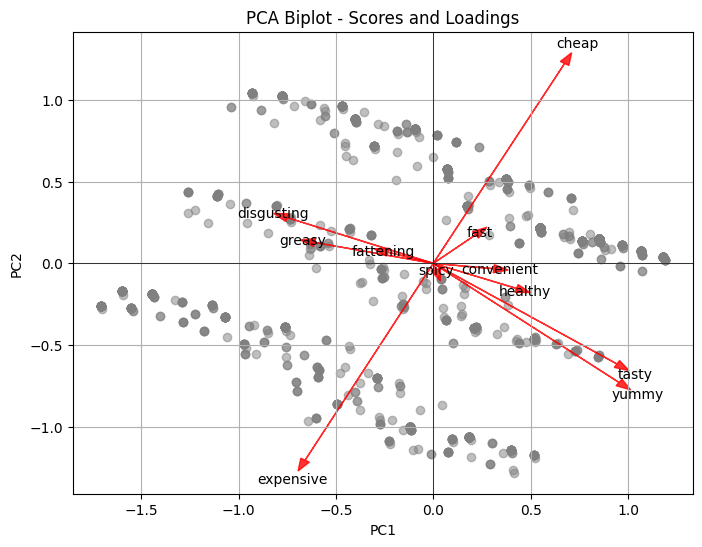

In [7]:
import matplotlib.pyplot as plt
scores = pca.transform(MD_x_binary)
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], color='grey', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot - Scores and Loadings')
for i, feature in enumerate(MD_x_binary.columns):
    plt.arrow(0, 0,                     
              pca.components_[0, i]*2,  
              pca.components_[1, i]*2,
              color='red', alpha=0.8, head_width=0.05)
    plt.text(pca.components_[0, i]*2.2,
             pca.components_[1, i]*2.2,
             feature, color='black', ha='center', va='center')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


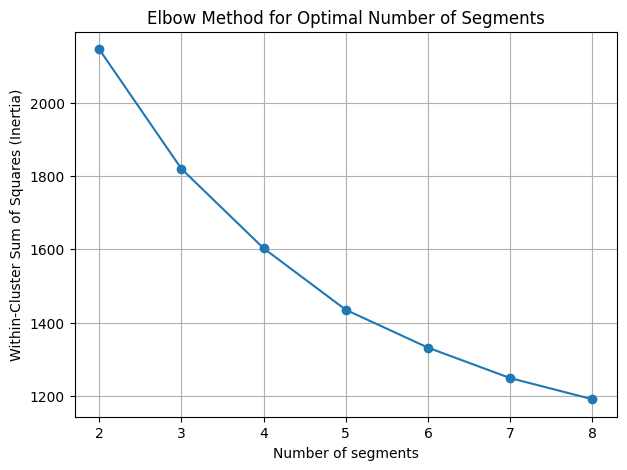

In [13]:
import matplotlib.pyplot as plt
k_values = range(2, 9)
plt.figure(figsize=(7, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Segments')
plt.xlabel('Number of segments')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [17]:
print(1)

1


In [8]:
!pip install pomegranate



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.cluster import KMeans
import pandas as pd
kmeans = KMeans(n_clusters=4, random_state=1234, n_init=10)
km_labels = kmeans.fit_predict(MD_x_binary)
column_names=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting']
md_df = pd.DataFrame(MD_x_binary, columns=column_names[:11])  # use your real column names
md_df['Cluster'] = km_labels



C:\Users\Visha\E\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


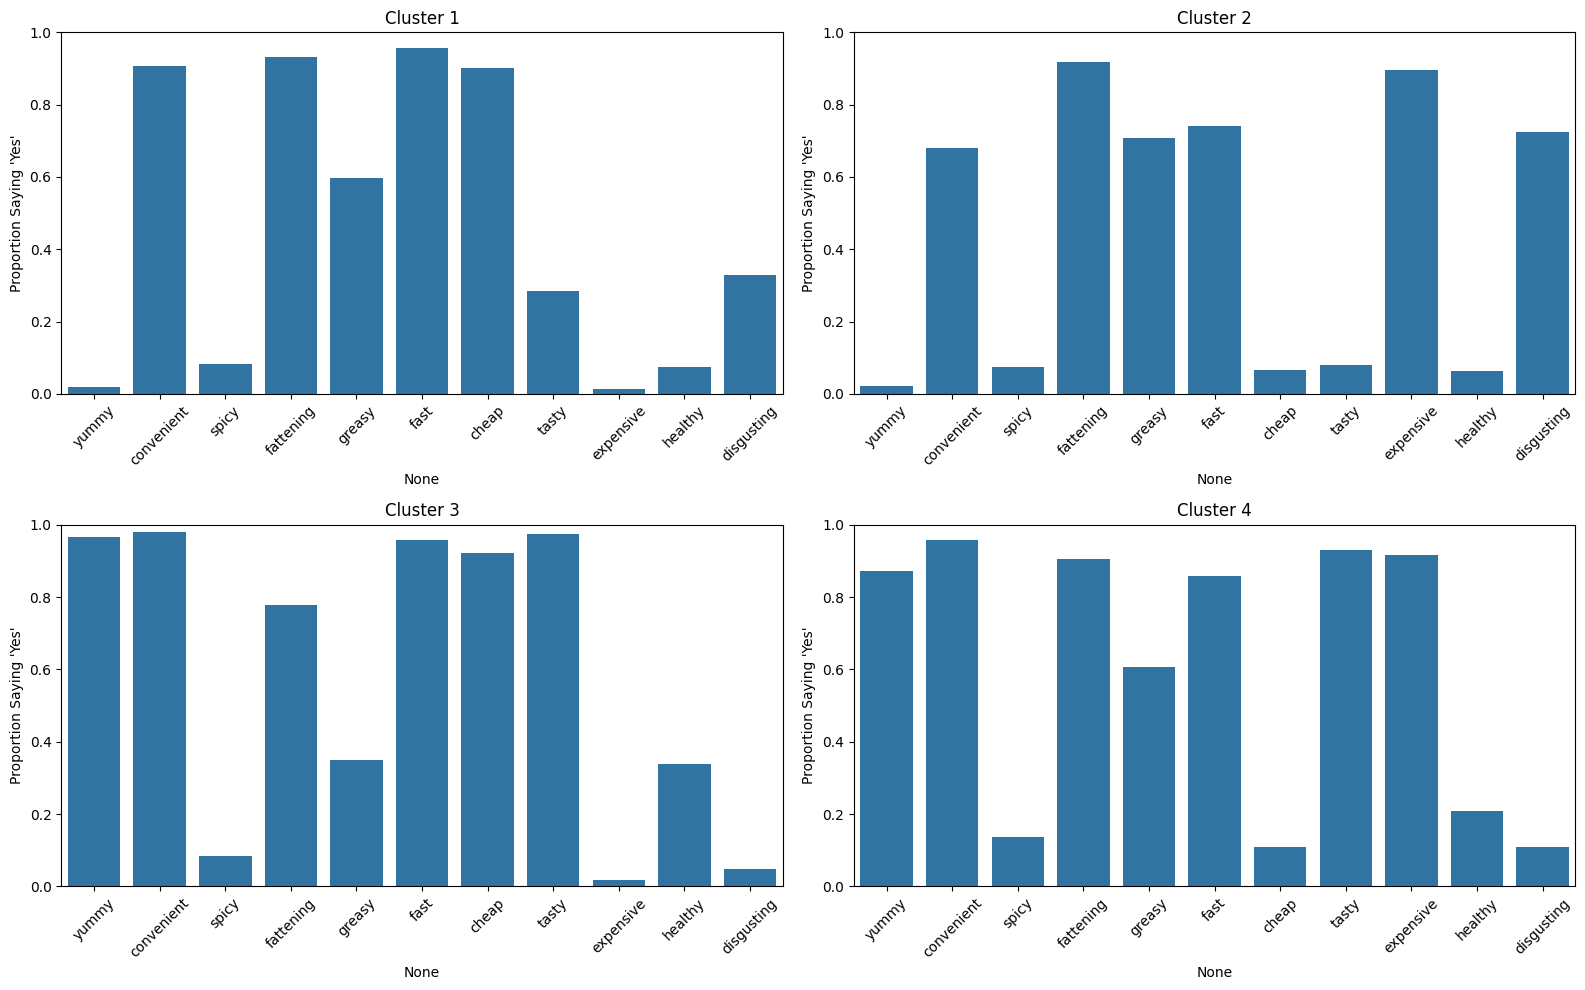

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
for cluster_id in range(4):
    cluster_data = md_df[md_df['Cluster'] == cluster_id].drop(columns='Cluster')
    mean_responses = cluster_data.mean()  # Mean of 0/1 is percentage saying 'Yes'
    sns.barplot(x=mean_responses.index, y=mean_responses.values, ax=axes[cluster_id])
    axes[cluster_id].set_ylim(0, 1)
    axes[cluster_id].set_title(f"Cluster {cluster_id + 1}")
    axes[cluster_id].set_ylabel("Proportion Saying 'Yes'")
    axes[cluster_id].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.cluster import KMeans

models = {}
for k in range(2, 9):
    models[k] = KMeans(n_clusters=k, random_state=1234, n_init=10).fit(MD_x_binary)
MD_k4 = models[4]


C:\Users\Visha\E\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Visha\E\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Visha\E\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Visha\E\python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
n_boot = 100
n_clusters = 4
ari_scores = np.zeros((n_boot, n_clusters))
kmeans_original = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
original_labels = kmeans_original.fit_predict(MD_x_binary)
for i in range(n_boot):
    sample_indices = resample(range(len(MD_x_binary)), replace=True)
    sample_data = MD_x_binary[sample_indices]

    kmeans_boot = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
    try:
        boot_labels = kmeans_boot.fit_predict(sample_data)
        # Map back to full data ARI (approximate stability)
        score = adjusted_rand_score(original_labels[sample_indices], boot_labels)
        ari_scores[i, :] = score
    except:
        ari_scores[i, :] = np.nan


In [13]:
pip install pomegranate --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip install --upgrade --force-reinstall pomegranate


  Using cached pomegranate-1.1.2-py3-none-any.whl.metadata (566 bytes)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 325.1 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 358.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
  Using cached torch-2.6.0-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached apricot_select-0.6.1-py3-none-any.whl
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.0 MB/s eta 0:00:00
  Using cached nose-1.3.7-py3-none-an

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.4 which is incompatible.
matplotlib 3.8.2 requires numpy<2,>=1.21, but you have numpy 2.2.4 which is incompatible.
pandas 2.1.3 requires numpy<2,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.
s3fs 2024.6.1 requires fsspec==2024.6.1.*, but you have fsspec 2025.3.2 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from pomegranate import BernoulliDistribution, HiddenMarkovModel
import numpy as np
models = {}
for k in range(2, 9):
    components = [BernoulliDistribution.from_samples(MD_x_binary) for _ in range(k)]
    model = HiddenMarkovModel.from_samples(BernoulliDistribution, n_components=k, X=MD_x_binary.tolist())
    models[k] = model


ImportError: cannot import name 'BernoulliDistribution' from 'pomegranate' (C:\Users\Visha\E\python\Lib\site-packages\pomegranate\__init__.py)

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

models = {}
for k in range(2, 9):
    model = BayesianGaussianMixture(n_components=k, covariance_type='diag', max_iter=1000, random_state=1234)
    model.fit(MD_x_binary)
    models[k] = model


In [ ]:
from pomegranate import BernoulliDistribution, GeneralMixtureModel
import numpy as np
best_models = {}

for k in range(2, 9): 
    best_bic = float('inf')
    best_model = None
    for rep in range(10): 
        model = GeneralMixtureModel.from_samples(
            BernoulliDistribution,
            n_components=k,
            X=MD_x_binary,
            max_iterations=100,
            verbose=False
        )  
        bic = model.bic(MD_x_binary)
        if bic < best_bic:
            best_bic = bic
            best_model = model
    
    best_models[k] = best_model


In [ ]:
import matplotlib.pyplot as plt
bic_scores = []
aic_scores = []
k_values = list(best_models.keys())
for k in k_values:
    model = best_models[k]
    bic_scores.append(model.bic(MD_x_binary))
    aic_scores.append(model.aic(MD_x_binary))
plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_scores, label='BIC', marker='o')
plt.plot(k_values, aic_scores, label='AIC', marker='s')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Information Criterion Value')
plt.title('Model Selection Criteria: AIC and BIC')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
conf_matrix = confusion_matrix(kmeans_labels, mixture_labels)
df_conf_matrix = pd.DataFrame(conf_matrix,
                              index=[f"KMeans_{i}" for i in range(conf_matrix.shape[0])],
                              columns=[f"Mixture_{i}" for i in range(conf_matrix.shape[1])])
print(df_conf_matrix)


In [ ]:
import numpy as np
from pomegranate import BernoulliDistribution, GeneralMixtureModel
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
kmeans_model = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans_model.fit_predict(MD_x_binary)
distributions = []
for cluster_idx in range(4):
    cluster_data = MD_x_binary[kmeans_labels == cluster_idx]
    prob = cluster_data.mean(axis=0)
    distributions.append(BernoulliDistribution(prob))
mixture_model_kmeans_init = GeneralMixtureModel(distributions)
mixture_model_kmeans_init.fit(MD_x_binary, max_iterations=100)
mixture_labels = mixture_model_kmeans_init.predict(MD_x_binary)
conf_matrix = confusion_matrix(kmeans_labels, mixture_labels)
df_conf_matrix = pd.DataFrame(conf_matrix,
                              index=[f'KMeans_{i}' for i in range(4)],
                              columns=[f'Mixture_{i}' for i in range(4)])
print(df_conf_matrix)


In [ ]:
log_likelihood = mixture_model_kmeans_init.log_probability(MD_x_binary).sum()
print("Log-likelihood of the fitted model:", log_likelihood)


In [ ]:
import pandas as pd
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)
print(like_counts)


In [ ]:
like_counts_by_freq = mcdonalds['Like'].value_counts(ascending=True)
print(like_counts_by_freq)


In [ ]:
mcdonalds['Like_n'] = 6 - mcdonalds['Like'].astype(int)
like_n_counts = mcdonalds['Like_n'].value_counts().sort_index()
print(like_n_counts)


In [ ]:
import statsmodels.formula.api as smf
independent_vars = '+'.join(mcdonalds.columns[:11])
formula = f'Like_n ~ {independent_vars}'
print(formula)
model = smf.ols(formula=formula, data=mcdonalds).fit()
print(model.summary())


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import numpy as np
X = mcdonalds.iloc[:, :11]
y = mcdonalds['Like_n']
kmeans = KMeans(n_clusters=2, random_state=1234)
clusters = kmeans.fit_predict(X)
models = {}
for cluster_id in np.unique(clusters):
    cluster_mask = (clusters == cluster_id)
    X_cluster = X[cluster_mask]
    y_cluster = y[cluster_mask
    reg = LinearRegression()
    reg.fit(X_cluster, y_cluster)
    models[cluster_id] = reg

In [ ]:
for cluster_id, model in models.items():
    print(f"Cluster {cluster_id}:")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print()


In [ ]:
for cluster_id, model in models.items():
    print(f"Segment {cluster_id + 1}")
    print("-" * 30)
    print("Coefficients:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

for cluster_id in models:
    cluster_mask = (clusters == cluster_id)
    X_cluster = X[cluster_mask]
    y_cluster = y[cluster_mask]
    y_pred = models[cluster_id].predict(X_cluster)

    print(f"Segment {cluster_id + 1}")
    print(f"R² Score: {r2_score(y_cluster, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_cluster, y_pred):.4f}")
    print()


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

significance_threshold = 0.05

for cluster_id in range(n_clusters):
    cluster_mask = (clusters == cluster_id)
    X_cluster = X[cluster_mask]
    y_cluster = y[cluster_mask]

    X_cluster_sm = sm.add_constant(X_cluster)
    model = sm.OLS(y_cluster, X_cluster_sm).fit()

    coefs = model.params
    pvals = model.pvalues

    # Plot
    plt.figure(figsize=(10, 5))
    colors = ['green' if p < significance_threshold else 'grey' for p in pvals]
    sns.barplot(x=coefs.index, y=coefs.values, palette=colors)
    plt.title(f"Segment {cluster_id + 1} Coefficients (Significant in Green)")
    plt.ylabel("Coefficient Value")
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

MD_x_binary_T = MD_x_binary.T  
dist_matrix = pdist(MD_x_binary_T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=MD_x_binary_T.index)
plt.title('Hierarchical Clustering of Variables')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, leaves_list
df = MD_x_binary.copy()
df['Cluster'] = MD_k4_labels  
cluster_means = df.groupby('Cluster').mean()
linkage_matrix = linkage(pdist(cluster_means.T), method='ward')
ordered_variables = cluster_means.columns[leaves_list(linkage_matrix)][:-1]  # skip 'Cluster'
cluster_means = cluster_means[ordered_variables]
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means, cmap="YlGnBu", annot=True, cbar=True)
plt.title("Cluster-wise Average Binary Responses")
plt.xlabel("Attributes")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_binary)
df_plot = pd.DataFrame(MD_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = MD_k4_labels  # use your cluster labels here
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Clusters Projected onto First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
components = pca.components_.T
for i, var in enumerate(MD_x_binary.columns):
    plt.arrow(0, 0, components[i, 0]*2, components[i, 1]*2,
              color='gray',


In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame({
    'Cluster': MD_k4_labels,          
    'Like': mcdonalds['Like']         
})
contingency_table = pd.crosstab(df['Cluster'], df['Like'])

plt.figure(figsize=(10, 6))
mosaic(contingency_table.stack())
plt.xlabel('Segment Number')
plt.title('')
plt.show()
